In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns


In [36]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargar DataFrame

In [37]:
amazon_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_data.csv")

In [38]:
# Cambiamos el nombre de la primera columna a date
columns = list(amazon_df.columns)
columns[0] = "Date"
amazon_df.columns = columns

In [39]:
# Convertimos Date a Fecha
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])

In [40]:
# Ponemos a la fecha como índice
amazon_df = amazon_df.set_index("Date")

In [41]:
amazon_df['Difference'] = amazon_df['Close'] - amazon_df['Open']

In [42]:
amazon_df['Year'] = amazon_df.index.year.astype(str)

In [43]:
amazon_df

,High,Low,Open,Close,Volume,Adj Close,Difference,Year
Date,,,,,,,,
2009-01-01,54.529999,51.070000,51.349998,54.360001,7296400.0,0.000000,3.010002,2009
2009-01-02,54.529999,51.070000,51.349998,54.360001,7296400.0,0.000000,3.010002,2009
2009-01-03,54.933333,51.723333,52.809999,54.260001,8034200.0,-0.183958,1.450002,2009
2009-01-04,55.336667,52.376666,54.269999,54.160001,8772000.0,-0.367917,-0.109998,2009
2009-01-05,55.740002,53.029999,55.730000,54.060001,9509800.0,-0.551875,-1.669998,2009
...,...,...,...,...,...,...,...,...
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600.0,22.968667,-13.119995,2019
2019-12-28,1895.600016,1857.546672,1879.946696,1862.163371,5349300.0,22.466436,-17.783325,2019
2019-12-29,1889.800008,1849.083333,1876.973348,1854.526693,4512000.0,21.964204,-22.446655,2019


## Precios de las acciones por día

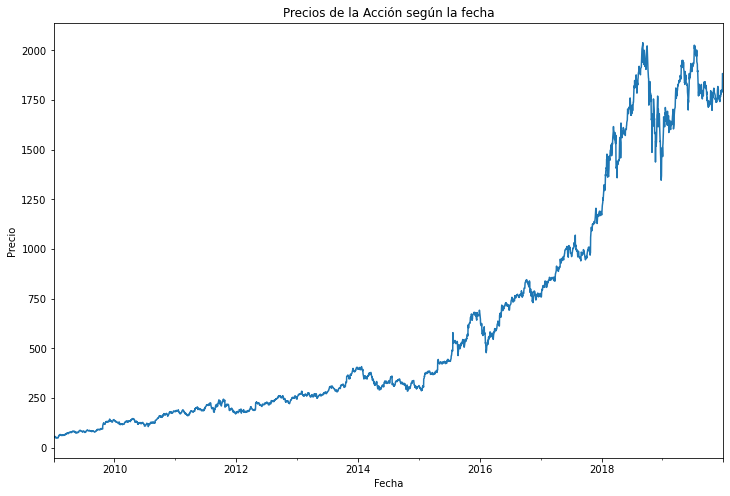

In [44]:
amazon_df.Open.plot( figsize=(12,8) )
plt.title("Precios de la Acción según la fecha")
plt.xlabel("Fecha");
plt.ylabel("Precio");

### Precio de las acciones por año

In [45]:
amazon_by_year = amazon_df.groupby("Year").first()

In [46]:
amazon_by_year = amazon_df.resample("Y").first()
amazon_by_year.index = amazon_by_year.index.year

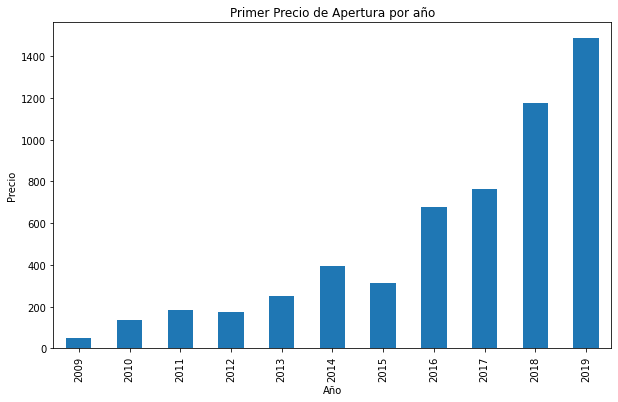

In [47]:
amazon_by_year.Open.plot.bar(figsize=(10,6))
plt.title("Primer Precio de Apertura por año")
plt.xlabel("Año");
plt.ylabel("Precio");

## Cambio en el valor de la acción por año

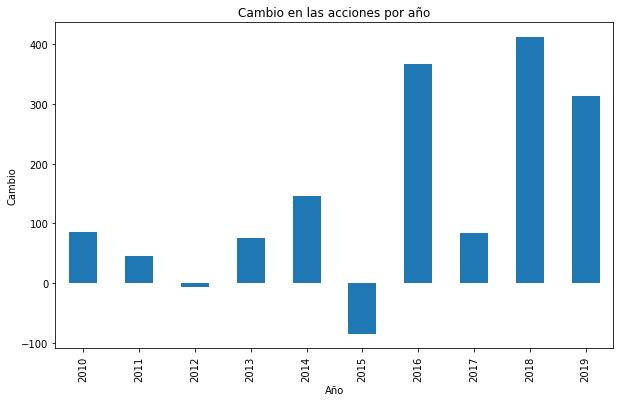

In [48]:
amazon_by_year['Open'].diff().dropna().plot.bar(figsize=(10,6))
plt.title("Cambio en las acciones por año")
plt.xlabel("Año");
plt.ylabel("Cambio");

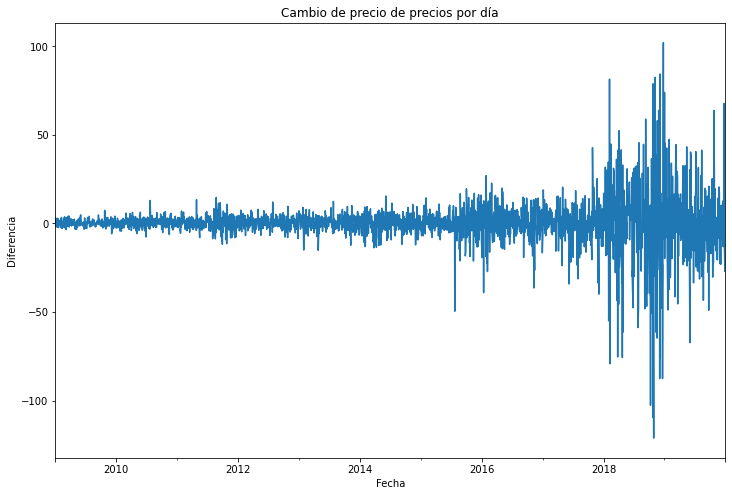

In [49]:
amazon_df.Difference.plot( figsize=(12,8) )
plt.title("Cambio de precio de precios por día")
plt.xlabel("Fecha");
plt.ylabel("Diferencia");

# Análisis de outliers

In [50]:
# Casi todos los sobresaltos fueron en el 2018
amazon_df.Difference.sort_values()

Date
2018-10-29   -121.119995
2018-10-24   -109.500000
2018-10-10   -102.640015
2018-12-04    -87.599976
2018-12-21    -87.540039
                 ...    
2018-10-25     78.830078
2018-02-06     81.380005
2018-11-07     82.489990
2018-12-06     84.319946
2018-12-26    102.010010
Name: Difference, Length: 4017, dtype: float64

In [27]:
# Graficar grafico de precios solo para el 2018

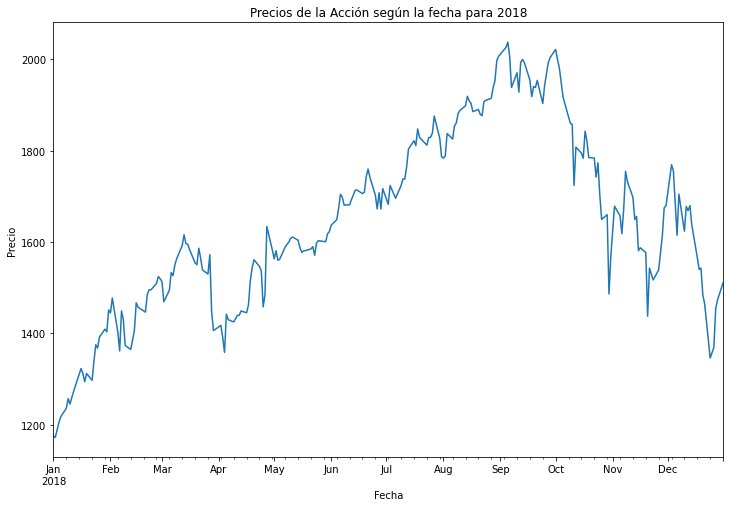

In [51]:
amazon_df[amazon_df.index.year == 2018].Open.plot( figsize=(12,8) )
plt.title("Precios de la Acción según la fecha para 2018")
plt.xlabel("Fecha");
plt.ylabel("Precio");

# Precio adjuntado por fecha

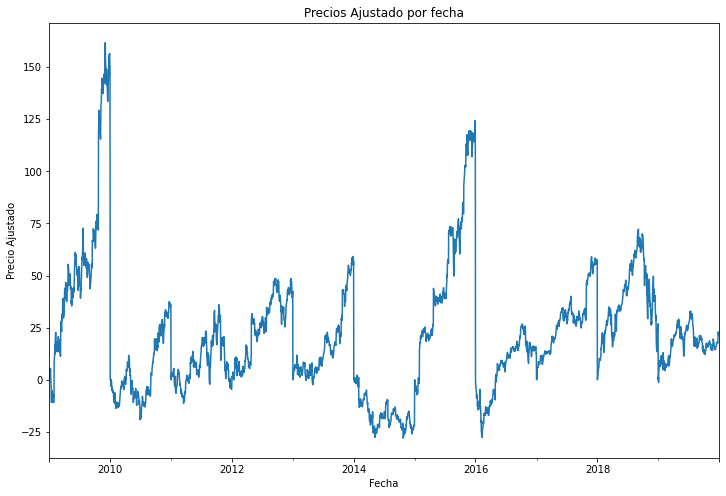

In [52]:
amazon_df['Adj Close'].plot( figsize=(12,8) )
plt.title("Precios Ajustado por fecha")
plt.xlabel("Fecha");
plt.ylabel("Precio Ajustado");

# Boxplot de diferencia de precios por día

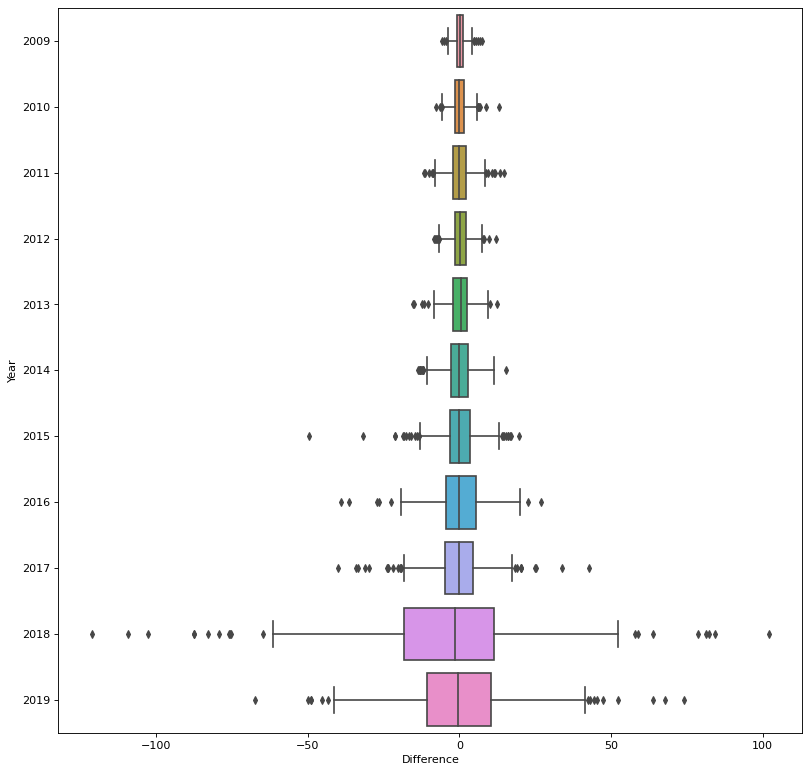

In [53]:
plt.figure(figsize=(12, 12), dpi=80)

sns.boxplot(data=amazon_df, x="Difference", y ="Year")